# DATA 515: Homework 1

In [1]:
!pwd

/Users/macbook/DATA515/Week2/homework-1-manipulating-data-mykebrowne/analysis


In [2]:
import pandas as pd

### Read rows.csv (from https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD) into pandas dataframe 

In [3]:

rows_df = pd.read_csv("/Users/macbook/DATA515/Week2/homework-1-manipulating-data-mykebrowne/data/rows.csv", \
                      sep=',', header=0)

In [4]:
rows_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [5]:
print(rows_df.dtypes)

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object


In [6]:
# Convert Date column to datatype Datetime 
rows_df["Date"] = pd.to_datetime(rows_df["Date"], format= '%m/%d/%Y %I:%M:%S %p')

In [7]:
print(rows_df.dtypes)

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
dtype: object


### Add columns to the dataframe:  
- Total = East + West 
- Hour of the day 
- Year 


In [8]:
rows_df["Bridge Total"] = rows_df["Fremont Bridge East Sidewalk"] + rows_df["Fremont Bridge West Sidewalk"]
rows_df["Hour"] = rows_df["Date"].dt.hour 
rows_df["Year"] = rows_df["Date"].dt.year 
rows_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Bridge Total,Hour,Year
0,2012-10-03 00:00:00,13.0,4.0,9.0,13.0,0,2012
1,2012-10-03 01:00:00,10.0,4.0,6.0,10.0,1,2012
2,2012-10-03 02:00:00,2.0,1.0,1.0,2.0,2,2012
3,2012-10-03 03:00:00,5.0,2.0,3.0,5.0,3,2012
4,2012-10-03 04:00:00,7.0,6.0,1.0,7.0,4,2012


### Subset the data from year 2016
               

In [9]:
rows_df.shape

(65688, 7)

In [10]:
rows_2016 = rows_df[(rows_df["Year"]==2016)]
rows_2016.shape

(8784, 7)

### Plot the counts by hour (assume this is for the entire dataset) 

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
type(rows_df)

pandas.core.frame.DataFrame

In [13]:
count_by_hour = rows_df.groupby(["Hour"], as_index=False)["Bridge Total"].sum()

In [14]:
print(count_by_hour)

    Hour  Bridge Total
0      0       31486.0
1      1       16683.0
2      2       10908.0
3      3        8064.0
4      4       17989.0
5      5       70627.0
6      6      249553.0
7      7      632384.0
8      8      899880.0
9      9      523657.0
10    10      273918.0
11    11      240743.0
12    12      255012.0
13    13      272300.0
14    14      296328.0
15    15      379143.0
16    16      635050.0
17    17     1073695.0
18    18      727250.0
19    19      354691.0
20    20      203842.0
21    21      131168.0
22    22       86369.0
23    23       56973.0


In [15]:
type(count_by_hour)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Total number of bicycles crossing bridge for each hour of the day for entire dataset')

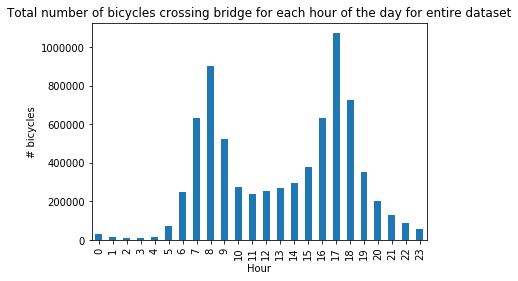

In [16]:
count_by_hour.plot(x='Hour', y='Bridge Total', kind='bar', legend=False)
plt.ylabel("# bicycles")
plt.title("Total number of bicycles crossing bridge for each hour of the day for entire dataset")

### Calculate the average busiest hour of the day 

In [25]:
mean_count_by_hour = rows_df.groupby(["Hour"], as_index=False)["Bridge Total"].mean()
mean_count_by_hour.rename(columns={'Bridge Total':'Mean # Bicycles'}, inplace=True)

In [27]:
mean_count_by_hour

,Hour,Mean # Bicycles
0,0,11.503836
1,1,6.095360
2,2,3.994141
3,3,2.946292
4,4,6.572525
5,5,25.804531
6,6,91.177567
7,7,231.050055
8,8,328.783339
9,9,191.395102
